In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16
from numpy import argmax
import os

In [5]:
PATH = "C:/Users/katty/Downloads/archive/Eye_diseases/Eye_diseases"
data_dir_list = os.listdir(PATH)
data_dir_list

['Bulging_Eyes', 'Cataracts', 'Crossed_Eyes', 'Glaucoma', 'Uveitis']

In [6]:
img_rows=224
img_cols=224
num_channel=3

num_epoch = 5
batch_size = 32

img_data_list=[]
classes_names_list=[]
target_column=[]
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting image from {} folder".format(dataset))
    img_list= os.listdir(PATH +"/"+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH +"/"+dataset+"/"+img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting image from Bulging_Eyes folder
Getting image from Cataracts folder
Getting image from Crossed_Eyes folder
Getting image from Glaucoma folder
Getting image from Uveitis folder


In [7]:
import numpy as np
num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) # convert images in numpy array 
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape 


num_classes 5
Shape of image data (383, 224, 224, 3)


In [8]:
num_of_samples

383

In [9]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2, 3, 4], dtype=int64)

In [10]:
target_column

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [11]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)

In [12]:
first_Mod = Sequential()

first_Mod.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
first_Mod.add(Conv2D(64,(3,3),activation='relu'))
first_Mod.add(MaxPool2D(pool_size=(2,2)))
first_Mod.add(Dropout(0.2))

first_Mod.add(Conv2D(128,(3,3),activation='relu'))
first_Mod.add(Conv2D(128,(3,3),activation='relu'))
first_Mod.add(MaxPool2D(pool_size=(2,2)))
first_Mod.add(Dropout(0.2))

first_Mod.add(Flatten())
first_Mod.add(Dense(128,activation='relu'))
first_Mod.add(Dropout(0.2))
first_Mod.add(Dense(num_classes,activation='softmax'))
first_Mod.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

first_Mod.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                     

In [14]:
hist = first_Mod.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))
score = first_Mod.evaluate(X_test,y_test,batch_size=batch_size)

Epoch 1/50


9/9 [==============================] - 375s 40s/step - loss: 6.1741 - accuracy: 0.3470 - val_loss: 1.4838 - val_accuracy: 0.4500
Epoch 2/50
9/9 [==============================] - 512s 59s/step - loss: 1.3718 - accuracy: 0.4403 - val_loss: 1.4458 - val_accuracy: 0.4500
Epoch 3/50
9/9 [==============================] - 520s 58s/step - loss: 1.3819 - accuracy: 0.4851 - val_loss: 1.4427 - val_accuracy: 0.4500
Epoch 4/50
1/9 [==>...........................] - ETA: 8:19 - loss: 1.3936 - accuracy: 0.5000

In [13]:
print("Loss of the model is - " , first_Mod.evaluate(X_temp,y_temp)[0])
print("Accuracy of the model is - " , first_Mod.evaluate(X_temp,y_temp)[1]*100 , "%")

4/4 [==============================] - 8s 2s/step - loss: 4.9726 - accuracy: 0.4174
Loss of the model is -  4.972647666931152
4/4 [==============================] - 8s 2s/step - loss: 4.9726 - accuracy: 0.4174
Accuracy of the model is -  41.7391300201416 %


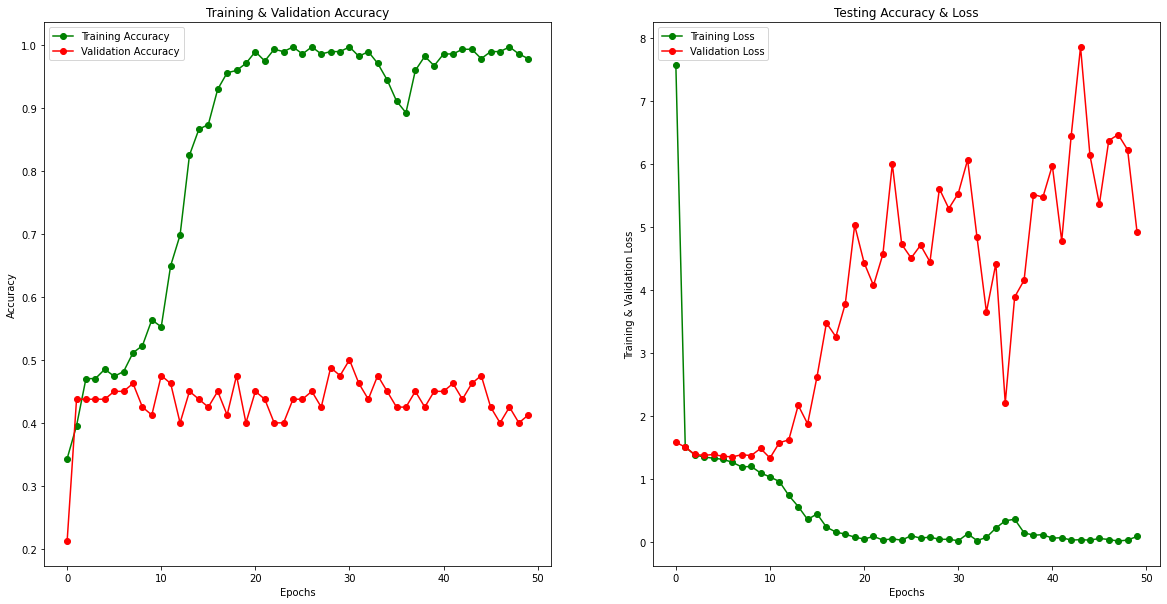

In [14]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [15]:
predictions = first_Mod.predict(X_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([7.4616060e-20, 5.0328211e-14, 1.0000000e+00, 9.9366057e-17,
       4.0654433e-23, 3.2783230e-04, 5.9375960e-01, 8.5747108e-02,
       3.1995809e-01, 2.0735394e-04, 5.3595728e-04, 2.3044307e-02,
       9.7623140e-01, 1.8063778e-04, 7.6952874e-06], dtype=float32)

In [16]:
from tensorflow.keras.models import load_model
first_Mod.save('eyedisease.h5')